In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
print("Loading dataset...")
df = pd.read_csv("insurance_claims.csv")
df.head()

Loading dataset...


,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
# Some values = '?' so lets replace missing values with np.nan
df.replace('?', np.nan, inplace = True)
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

### Checking if there are missing values

In [6]:
# missing values
df.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted            91
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

### Visualize missing values

In [7]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


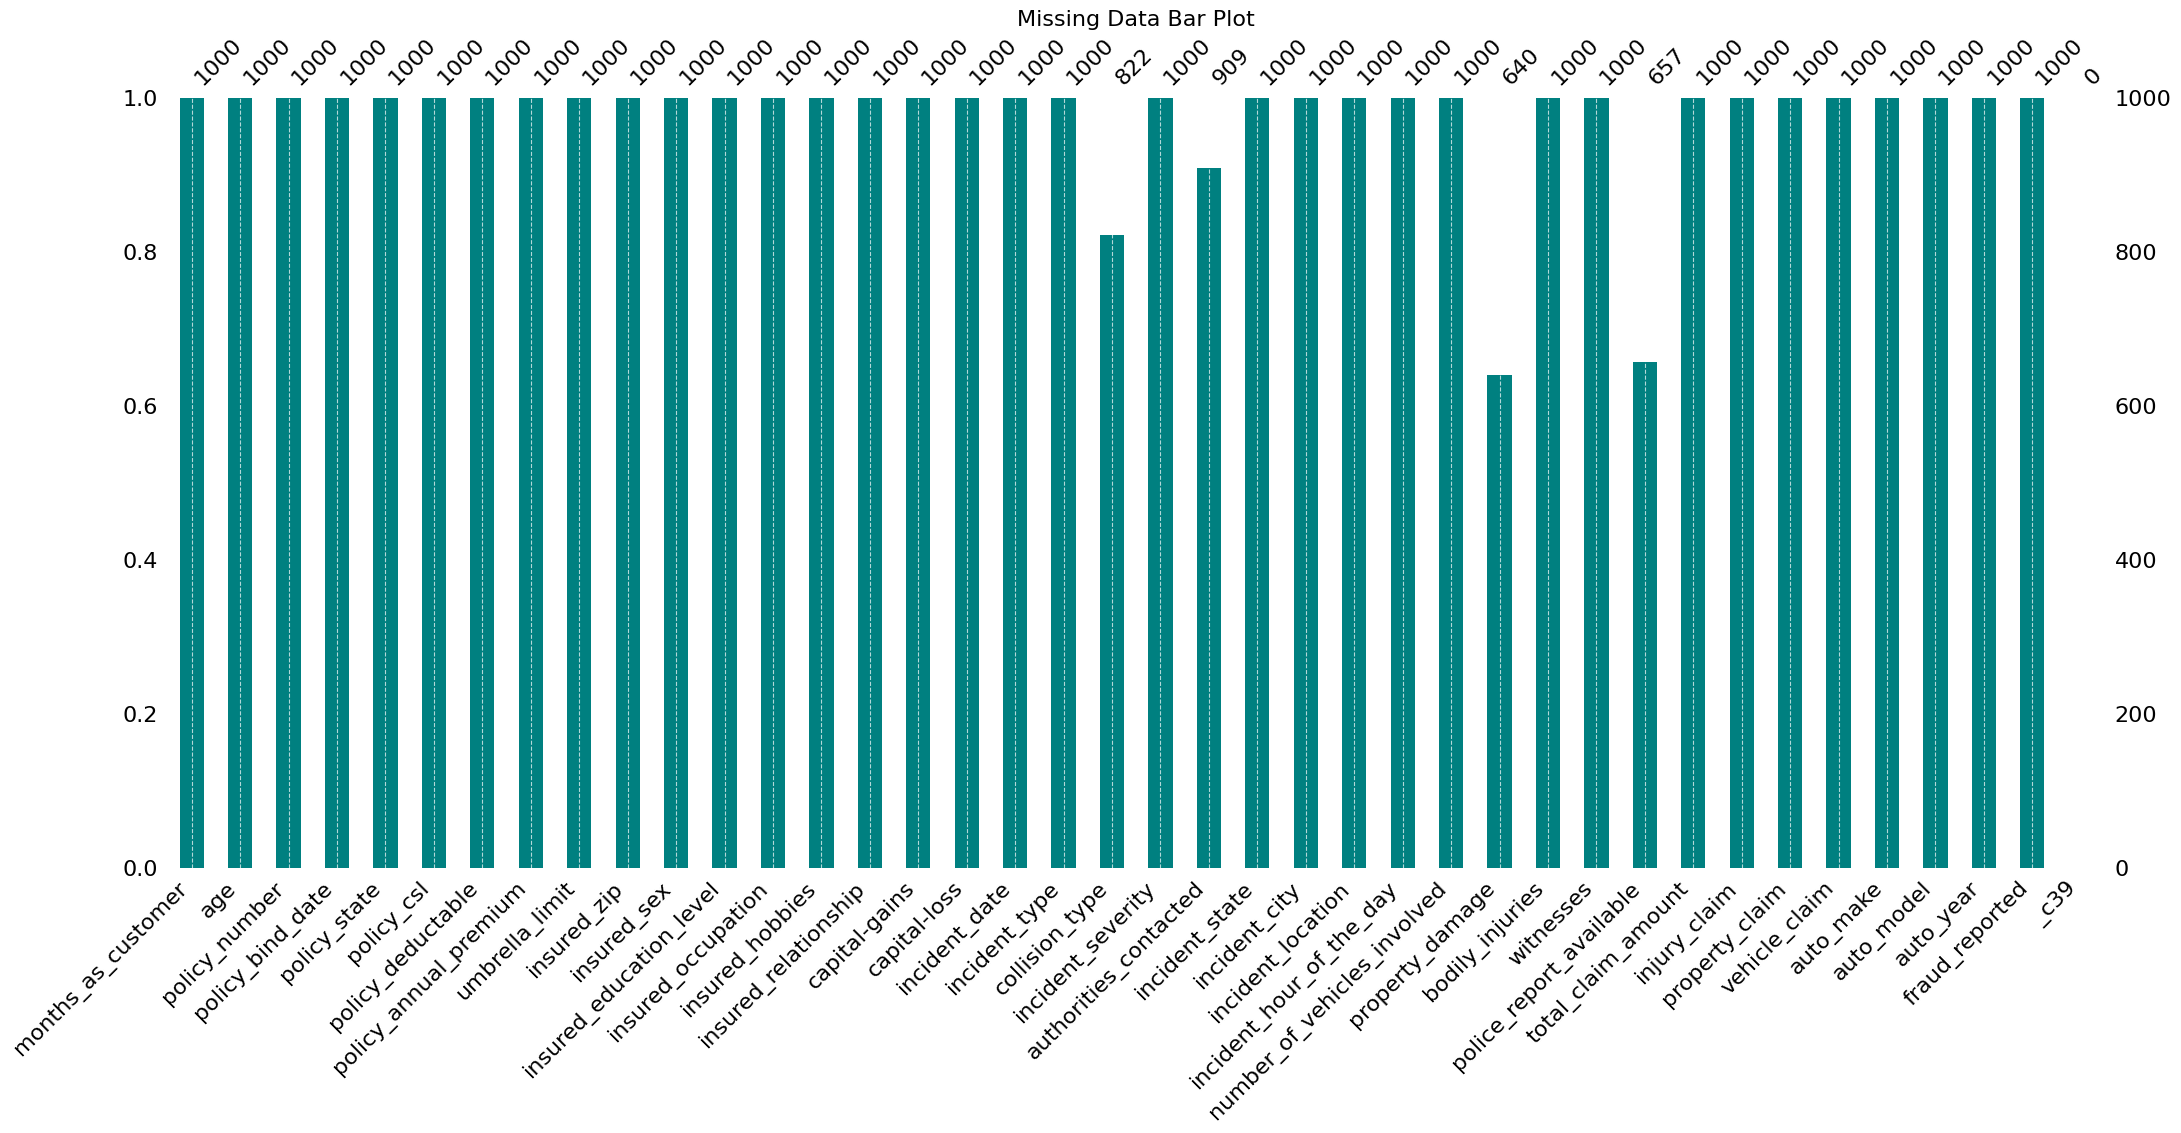

In [8]:
import missingno as msno

msno.bar(df, color='teal')

# Customize the plot
plt.title('Missing Data Bar Plot', fontsize=16)
plt.gca().set_facecolor('#f7f7f7')  # Change background color
plt.grid(color='white', linestyle='--', alpha=0.7)  # Add grid lines

plt.show()

### We can observe that columns collision_type, property_damage, police_report_available and authorities_contacted have missing values

In [9]:
df['collision_type'] = df['collision_type'].fillna(df['collision_type'].mode()[0])
df['property_damage'] = df['property_damage'].fillna(df['property_damage'].mode()[0])
df['police_report_available'] = df['police_report_available'].fillna(df['police_report_available'].mode()[0])
df['authorities_contacted'] = df['authorities_contacted'].fillna(df['authorities_contacted'].mode()[0])

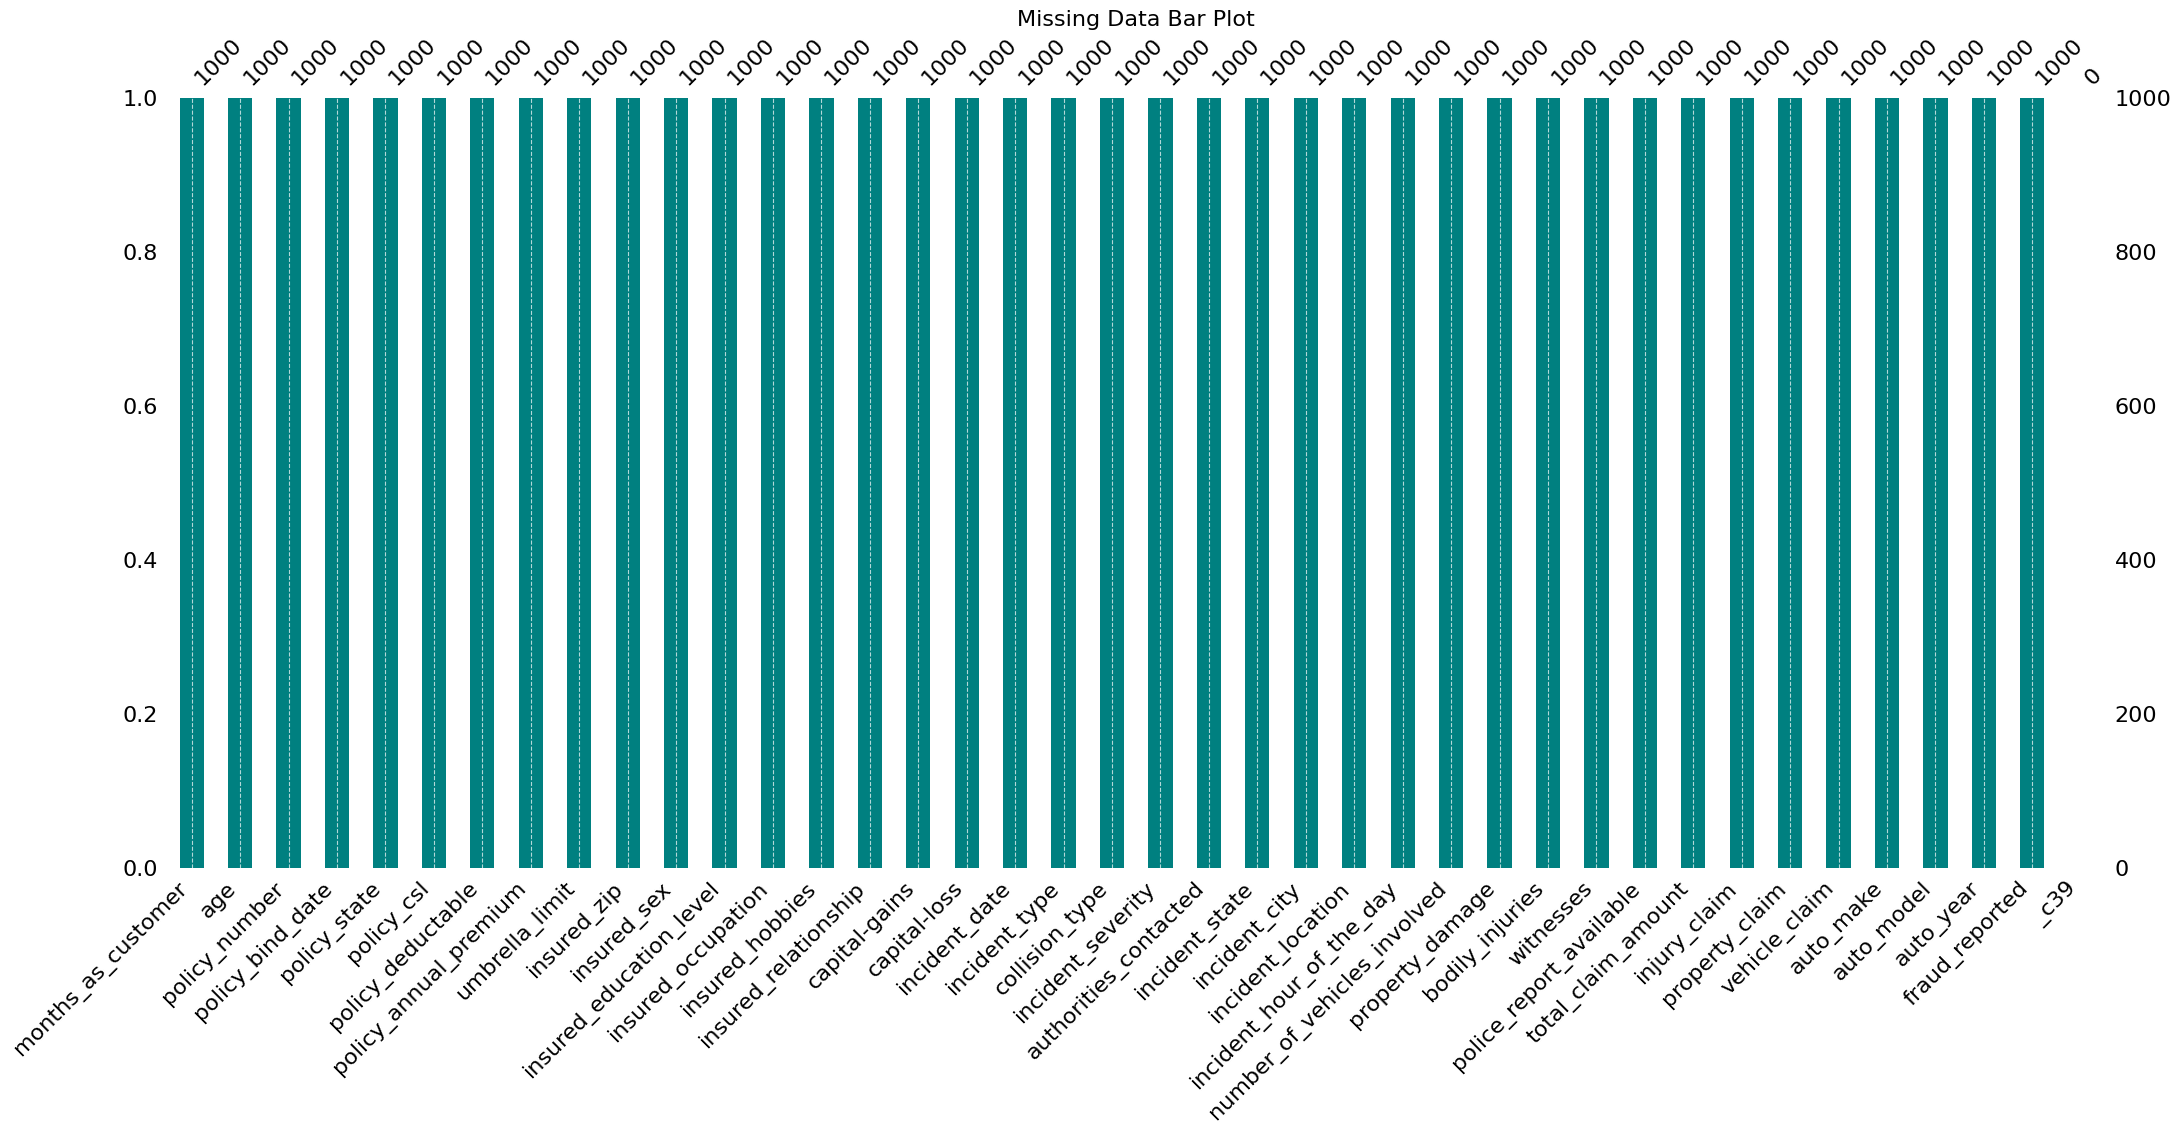

In [10]:
msno.bar(df, color='teal')

# Customize the plot
plt.title('Missing Data Bar Plot', fontsize=16)
plt.gca().set_facecolor('#f7f7f7')  # Change background color
plt.grid(color='white', linestyle='--', alpha=0.7)  # Add grid lines

plt.show()

### Plotting a heatmap

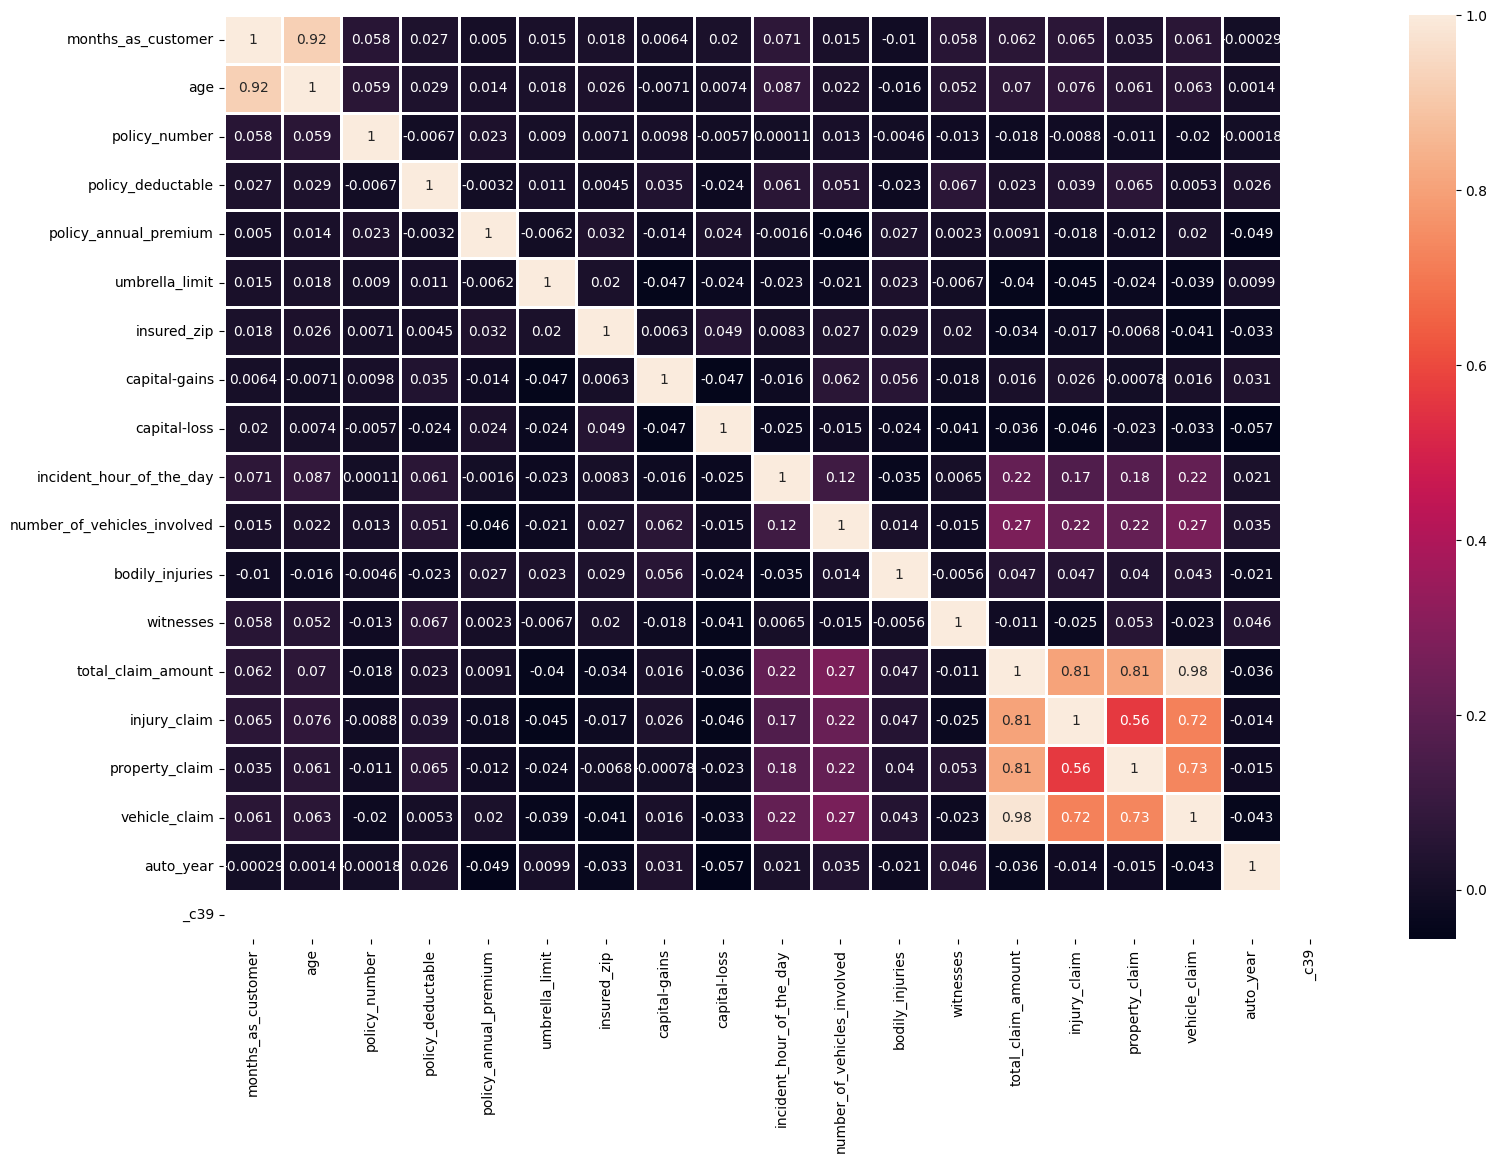

In [11]:
plt.figure(figsize = (18, 12))
numeric_df = df.select_dtypes(include=['number'])
corr = numeric_df.corr()
# corr = df.corr()

sns.heatmap(data = corr, annot = True, fmt = '.2g', linewidth = 1)
plt.show()

## Correlation Heatmap Analysis

This heatmap visually represents the correlation between different numerical variables in the dataset. Darker shades (black/purple) indicate weaker or no correlation (values near 0), while lighter shades (red/white) indicate stronger correlation (values closer to -1 or 1).

### Key Observations:
#### 1. Diagonal Elements:
- The diagonal values are **1**, as each variable is perfectly correlated with itself.

#### 2. Highly Correlated Variables:
- **`months_as_customer` and `age`** (0.92) → Strong positive correlation, meaning older customers tend to have longer tenure.
- **`total_claim_amount`, `injury_claim`, `property_claim`, and `vehicle_claim`** (>0.7) → High correlation indicates claims in different categories often occur together.
- **`vehicle_claim` and `total_claim_amount`** (0.98) → Nearly perfect correlation, suggesting vehicle claims significantly contribute to the total claim amount.

#### 3. Weak or No Correlation:
- Variables such as **`policy_number`**, **`umbrella_limit`**, and **`capital-gains`** have very low correlation with others, indicating minimal influence on overall patterns.

### Possible Insights:
#### 1. Multicollinearity:
- Strong correlation between **`total_claim_amount`**, **`injury_claim`**, **`property_claim`**, and **`vehicle_claim`** suggests redundancy.
- In predictive modeling, this could cause issues, and **feature selection techniques** may be needed.

#### 2. Feature Engineering:
- Variables with weak correlation to others (e.g., **`policy_number`**) might not contribute significantly to predictive models and could be removed.

#### 3. Fraud Detection Use Case:
- High correlation among claims could indicate patterns useful for fraud detection.
- Further analysis might reveal outliers or suspicious claims based on unexpected correlations.


## Model Training

In [12]:
!pip install xgboost

In [13]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve, auc
import joblib

### Feature selection

In [14]:
# Dropping columns which are not necessary for prediction
print("Selecting features...")
X = df.drop(['policy_number','policy_bind_date','policy_state','insured_zip','incident_location','incident_date',
           'incident_state','incident_city','insured_hobbies','auto_make','auto_model','auto_year', '_c39'], axis=1, errors='ignore')
y = df['fraud_reported']
X = pd.get_dummies(X, drop_first=True)  # One-hot encoding categorical variables
print("Feature selection done. Shape of feature matrix:", X.shape)

Selecting features...
Feature selection done. Shape of feature matrix: (1000, 56)


In [15]:
# Splitting data
print("Splitting dataset into training and testing sets...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Data split completed. Train shape:", X_train.shape, "Test shape:", X_test.shape)

Splitting dataset into training and testing sets...
Data split completed. Train shape: (800, 56) Test shape: (200, 56)


In [16]:
# Feature Scaling
print("Applying feature scaling...")
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print("Feature scaling applied.")

Applying feature scaling...
Feature scaling applied.


### Model Training

In [22]:
# Model Training
print("Initializing models...")
models = {
    "Random Forest": RandomForestClassifier(n_estimators=3, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=3, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=3, random_state=42),
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=3),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "Stochastic Gradient Boosting": GradientBoostingClassifier(n_estimators=3, subsample=0.6, random_state=42)
}


Initializing models...


In [23]:
results = {}
accuracy_scores = {}
for name, model in models.items():
    print(f"Training {name} model...")
    if name == "XGBoost":
        le = LabelEncoder()
        y_train = le.fit_transform(y_train)
        y_test = le.transform(y_test)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    accuracy = model.score(X_test, y_test)
    accuracy_scores[name] = accuracy
    results[name] = {
        "classification_report": classification_report(y_test, y_pred),
        "roc_auc": roc_auc_score(y_test, y_prob),
        "confusion_matrix": confusion_matrix(y_test, y_pred)
    }
    print(f"{name} Model Training Complete.")
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(f"{name} Model Report:\n", results[name]["classification_report"])
    print(f"ROC AUC Score: {results[name]['roc_auc']}\n")
    

Training Random Forest model...
Random Forest Model Training Complete.
Random Forest Accuracy: 1.0000
Random Forest Model Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       145
           1       1.00      1.00      1.00        55

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

ROC AUC Score: 1.0

Training Gradient Boosting model...
Gradient Boosting Model Training Complete.
Gradient Boosting Accuracy: 0.7250
Gradient Boosting Model Report:
               precision    recall  f1-score   support

           0       0.72      1.00      0.84       145
           1       0.00      0.00      0.00        55

    accuracy                           0.72       200
   macro avg       0.36      0.50      0.42       200
weighted avg       0.53      0.72      0.61       200

ROC AUC Score: 1.0

Training AdaBoost model...
A

### Confusion Matrix Plot

Generating confusion matrix plots...


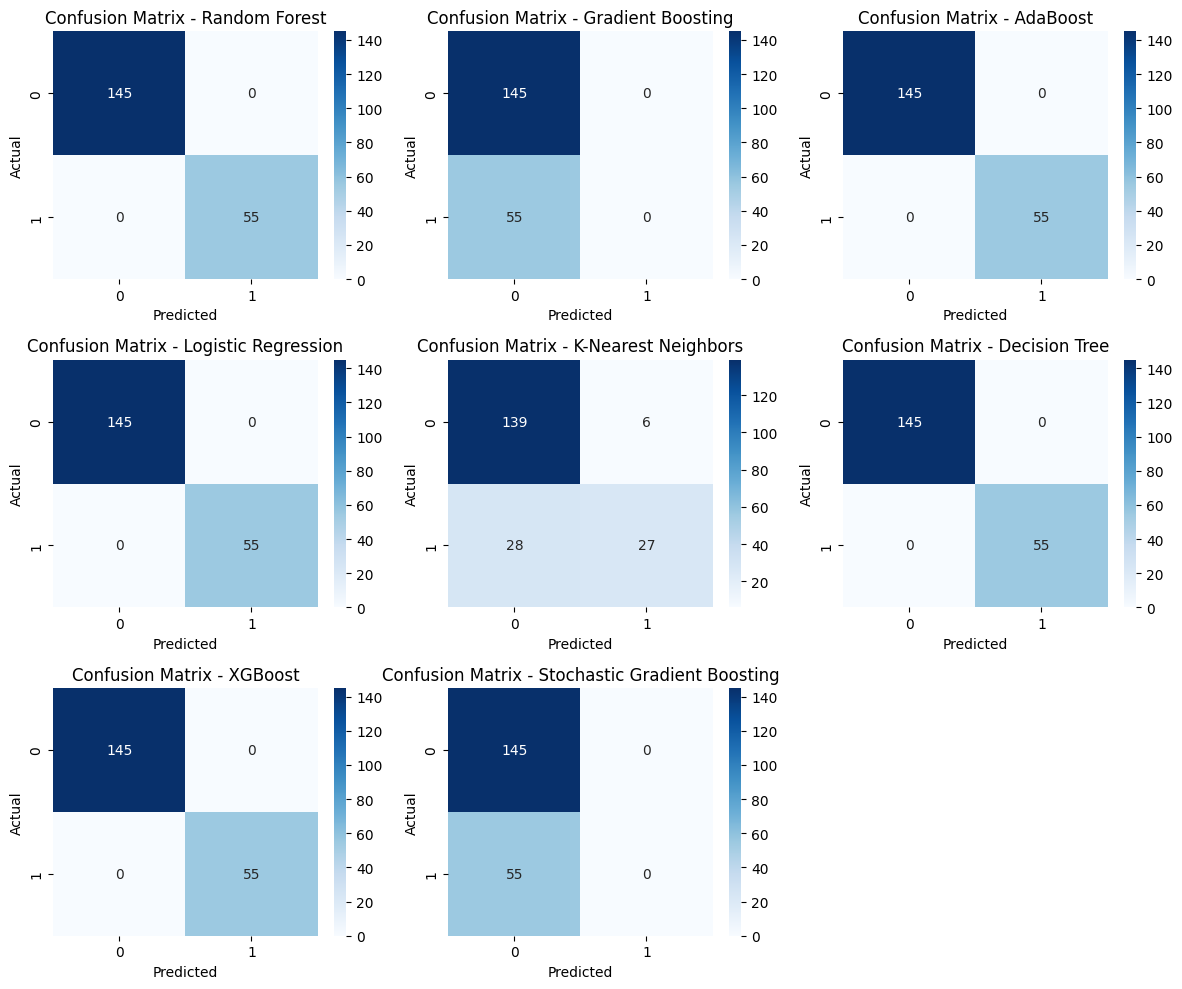

Confusion matrix plots generated.


In [24]:
# Confusion Matrix Plot
print("Generating confusion matrix plots...")
plt.figure(figsize=(12, 10))
for i, (name, model) in enumerate(models.items()):
    plt.subplot(3, 3, i+1)
    sns.heatmap(results[name]['confusion_matrix'], annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {name}')
plt.tight_layout()
plt.show()
print("Confusion matrix plots generated.")

### Model Accuracy Visualization

Visualizing model accuracy...


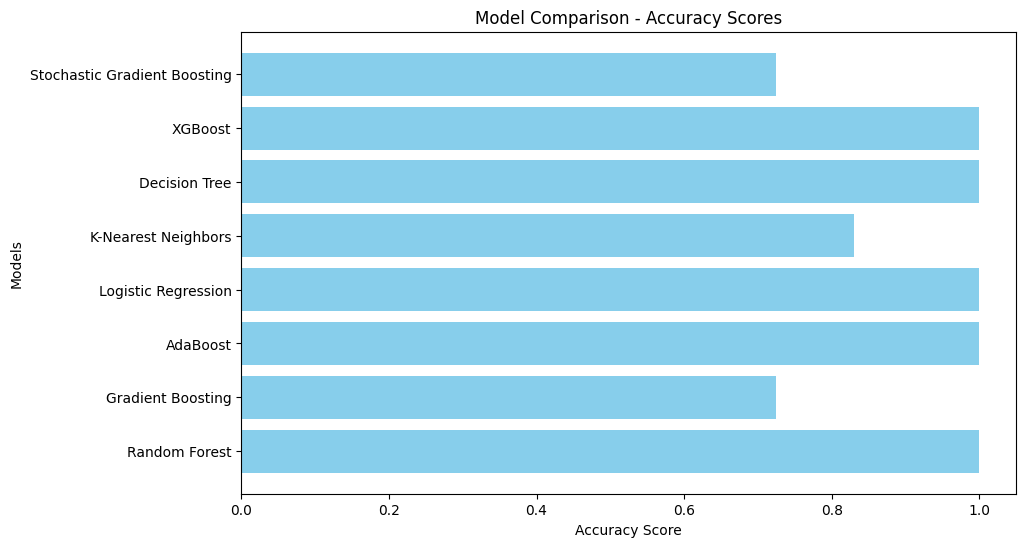

Model accuracy visualization completed.


In [25]:
print("Visualizing model accuracy...")
plt.figure(figsize=(10, 6))
plt.barh(list(accuracy_scores.keys()), list(accuracy_scores.values()), color='skyblue')
plt.xlabel("Accuracy Score")
plt.ylabel("Models")
plt.title("Model Comparison - Accuracy Scores")
plt.show()
print("Model accuracy visualization completed.")


### Save Models

In [26]:
print("Saving models...")
for name, model in models.items():
    joblib.dump(model, f"{name.lower().replace(' ', '_')}_model.pkl")
joblib.dump(scaler, "scaler.pkl")
print("Models saved successfully.")

Saving models...
Models saved successfully.


## Model Performance Analysis

### **Overview**
Several machine learning models were trained and evaluated for classification performance. The models include:
- Random Forest
- Gradient Boosting
- AdaBoost
- Logistic Regression
- K-Nearest Neighbors (KNN)
- Decision Tree
- XGBoost
- Stochastic Gradient Boosting

Key evaluation metrics considered:
- **Accuracy**: Measures the overall correctness of the model.
- **Precision, Recall, and F1-score**: Provide insights into class-wise performance.
- **ROC AUC Score**: Measures the model’s ability to distinguish between classes.

---

### **Model Performance Summary**

| Model                            | Accuracy | Precision (Class 1) | Recall (Class 1) | F1-score (Class 1) | ROC AUC Score |
|----------------------------------|----------|----------------------|------------------|--------------------|--------------|
| **Random Forest**                 | 1.0000   | 1.00                 | 1.00             | 1.00               | 1.0          |
| **Gradient Boosting**             | 0.7250   | 0.00                 | 0.00             | 0.00               | 1.0          |
| **AdaBoost**                      | 1.0000   | 1.00                 | 1.00             | 1.00               | 1.0          |
| **Logistic Regression**           | 1.0000   | 1.00                 | 1.00             | 1.00               | 1.0          |
| **K-Nearest Neighbors (KNN)**     | 0.8300   | 0.82                 | 0.49             | 0.61               | 0.7966       |
| **Decision Tree**                 | 1.0000   | 1.00                 | 1.00             | 1.00               | 1.0          |
| **XGBoost**                       | 1.0000   | 1.00                 | 1.00             | 1.00               | 1.0          |
| **Stochastic Gradient Boosting**  | 0.7250   | 0.00                 | 0.00             | 0.00               | 1.0          |

---

### **Observations & Insights**
#### **1. Perfect Scores for Some Models**
- Random Forest, AdaBoost, Logistic Regression, Decision Tree, and XGBoost achieved **100% accuracy** with an **ROC AUC score of 1.0**.
- These models perfectly classified all instances, which may indicate **overfitting** to the training data.
- Further validation on a separate test set is required to confirm their generalization ability.

#### **2. Poor Performance of Gradient Boosting & Stochastic Gradient Boosting**
- Both models have an accuracy of **72.50%**, but **F1-score for Class 1 is 0.00**, indicating they failed to predict the positive class (`1`).
- This suggests a strong bias toward the majority class (`0`), potentially due to class imbalance in the dataset.

#### **3. K-Nearest Neighbors (KNN) Shows Moderate Performance**
- KNN achieved **83.00% accuracy** with a recall of **49%** for class `1`, which means it correctly identified about half of the fraud cases.
- The **ROC AUC Score of 0.7966** suggests that the model has reasonable discrimination power but is not as strong as other models.

#### **4. Potential Overfitting Issues**
- Models with **100% accuracy** should be examined carefully for overfitting.
- The dataset may need additional **cross-validation**, **regularization**, or **hyperparameter tuning** to confirm whether the performance is realistic.

---

### **Next Steps**
1. **Check for Overfitting**: Validate models on an unseen dataset to determine if the high accuracy generalizes well.
2. **Balance the Dataset**: If class imbalance is present, consider **oversampling**, **undersampling**, or using **class weights**.
3. **Feature Engineering**: Investigate the importance of features and remove irrelevant ones.
4. **Hyperparameter Tuning**: Optimize models to improve performance while preventing overfitting.
